In [36]:
import pandas as pd
import numpy as np
df = pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


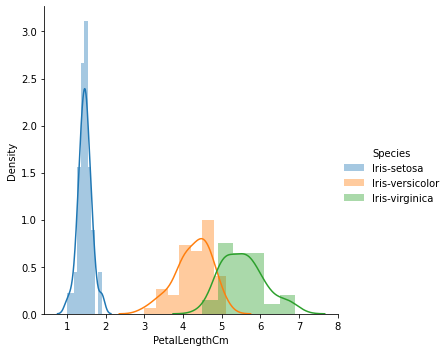

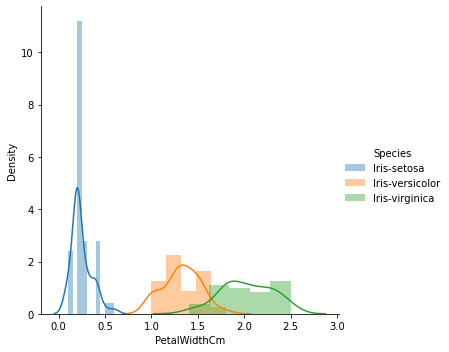

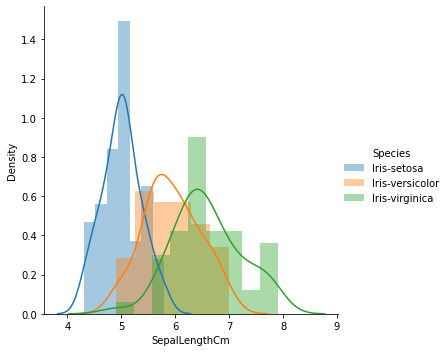

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

In [104]:
x = df.drop(['Id','Species'], axis = 1)

y = df['Species']

In [105]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


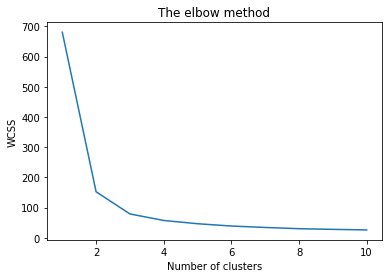

In [106]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Using the elbow method to determine the optimal number of clusters for k-means clustering
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [107]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6808136202936816
For n_clusters=3, the silhouette score is 0.5525919445499757
For n_clusters=4, the silhouette score is 0.4972279726640147
For n_clusters=5, the silhouette score is 0.4885175508886279
For n_clusters=6, the silhouette score is 0.36650401502359653
For n_clusters=7, the silhouette score is 0.3460695725811892
For n_clusters=8, the silhouette score is 0.36149709993373913


In [108]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 42)
label = kmeans.fit_predict(x)

In [109]:
kmeans.inertia_

152.36870647733906

In [110]:
cols = x.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

x = ms.fit_transform(x)
x = pd.DataFrame(x, columns=[cols])
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


From the histograms, we can see that the majority of the values are normally distributed, however the model may benefit from normalization as the data for species 1 and 2's petal width is more skewed than the other values and therefore may have less of an impact on the model.

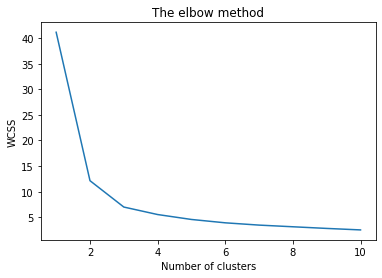

In [111]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Using the elbow method to determine the optimal number of clusters for k-means clustering
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [112]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6294675561906644
For n_clusters=3, the silhouette score is 0.5043188549150884
For n_clusters=4, the silhouette score is 0.4446273300650682
For n_clusters=5, the silhouette score is 0.351912893247111
For n_clusters=6, the silhouette score is 0.3468404499902478
For n_clusters=7, the silhouette score is 0.3352816630185609
For n_clusters=8, the silhouette score is 0.3392243556363642


In [113]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
label = kmeans.fit_predict(x)


In [114]:
kmeans.inertia_

12.14368828157972

In [115]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Conclusion - From the results we can see that the elbow method and silhouette scores for both normalized and un-normalized data showed a higher model accuracy at 2 clusters.

The un-normalized dataset returned an interia score of 152 and the normalized data set returned an inertia score of 12, the higher the inertia the less likely it is that the datapoints within one cluster are similar to each other.

The silhoutte scores for the un-normalized and normalized dataset were 0.68 and 0.62, the greater the score the more accurate the clusters as this means datapoints in seperate clusters are further from each other decreasing the chances of wrong values being grouped. 

For this dataset I suggest clustering using normalized data as it allows for high clustering accuracy with both the inertia and silhoutte scores.